In [12]:
import pandas as pd


In [16]:
%run analysis_utils.py

In [13]:
results_mean = pd.read_csv('fig2_metrics/metrics_10samples_mean.csv', index_col=0)
results_std = pd.read_csv('fig2_metrics/metrics_10samples_std.csv', index_col=0)

In [14]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio
model,,,,,,,,
Geneformer-V2-104M_continue,0.132666,0.096671,0.447959,0.655620,0.418344,0.745017,0.026559,0.225765
Geneformer-V2-104M_CLcancer,0.648102,0.506496,0.509267,0.969681,0.438935,0.840867,0.174468,0.554622
hvg,0.535608,0.265320,0.508813,0.965808,0.481053,0.950077,0.221971,0.436581
scvi_donor_id,0.675993,0.475049,0.593261,0.991059,0.479106,0.824882,0.181404,0.581434
Geneformer-V2-316M,0.712597,0.628071,0.507252,0.958874,0.452682,0.856805,0.178611,0.615973
Geneformer-V2-104M,0.680612,0.609960,0.503083,0.958886,0.437905,0.818556,0.165335,0.597885
scgpt_cancer,0.754777,0.731011,0.562042,0.980313,0.440433,0.862721,0.206015,0.682610
scfoundation,0.697104,0.594448,0.571232,0.988382,0.467406,0.860919,0.177870,0.620928
scgpt,0.727857,0.678384,0.562734,0.969631,0.440410,0.833574,0.161695,0.656325


In [27]:
import matplotlib.pyplot as plt
import numpy as np


    
import seaborn as sns

def plot_groups(data_df, cols=['ASW_label', 'NMI_label']):
    assert all(col in data_df.columns for col in cols), "One or more columns not found in data"
    assert 'group' in data_df.columns

    # Use Seaborn color palette for a modern look
    palette = sns.color_palette("Set2", n_colors=len(cols))
    column_colors = {col: palette[i] for i, col in enumerate(cols)}

    fig, ax = plt.subplots(figsize=(14, 6))
    labels = []
    xticks = []
    shift = 0
    gap = 1
    bar_width = 0.8 / len(cols)

    groups = sorted(data_df.group.unique())
    for g in groups:
        subset = data_df[data_df.group == g].copy().sort_values(cols[0])
        num_items = len(subset)

        for i, col in enumerate(cols):
            values = subset[col].values
            x_pos = shift + np.arange(num_items) + i * bar_width
            ax.bar(
                x_pos, values, 
                width=bar_width, 
                label=col if shift == 0 else None, 
                color=column_colors[col],
                edgecolor='white'
            )

            if i == 0:
                labels.extend(subset.index)
                xticks.extend(shift + np.arange(num_items) + (len(cols) / 2 - 0.5) * bar_width)

        shift += num_items + gap

    # Format axes and title
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels, rotation=90, fontsize=16)
    ax.set_ylim(0.2, 0.9)
    ax.legend( frameon=False, loc='upper right', fontsize=12)

    # Remove spines for a clean look
    sns.despine(ax=ax, left=True, right=True, top=True)
    ax.tick_params(axis='y', length=0)

    # ax.set_title("Comparison of Metrics by Group", fontsize=14, weight='bold')
    ax.set_ylabel("Score", fontsize=16)
    plt.tight_layout()
    return fig

In [17]:
results_mean['group'] = results_mean.index.map(map_groups)

In [18]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
model,,,,,,,,,
Geneformer-V2-104M_continue,0.132666,0.096671,0.447959,0.655620,0.418344,0.745017,0.026559,0.225765,Geneformer
Geneformer-V2-104M_CLcancer,0.648102,0.506496,0.509267,0.969681,0.438935,0.840867,0.174468,0.554622,Geneformer
hvg,0.535608,0.265320,0.508813,0.965808,0.481053,0.950077,0.221971,0.436581,Baseline
scvi_donor_id,0.675993,0.475049,0.593261,0.991059,0.479106,0.824882,0.181404,0.581434,Baseline
Geneformer-V2-316M,0.712597,0.628071,0.507252,0.958874,0.452682,0.856805,0.178611,0.615973,Geneformer
Geneformer-V2-104M,0.680612,0.609960,0.503083,0.958886,0.437905,0.818556,0.165335,0.597885,Geneformer
scgpt_cancer,0.754777,0.731011,0.562042,0.980313,0.440433,0.862721,0.206015,0.682610,scGPT
scfoundation,0.697104,0.594448,0.571232,0.988382,0.467406,0.860919,0.177870,0.620928,Other
scgpt,0.727857,0.678384,0.562734,0.969631,0.440410,0.833574,0.161695,0.656325,scGPT


In [19]:
results_mean = results_mean[~results_mean.index.str.startswith('__')]

In [20]:
results_mean.index = results_mean.index.map(model_name_map)

In [21]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
model,,,,,,,,,
GF-V2 [continue],0.132666,0.096671,0.447959,0.655620,0.418344,0.745017,0.026559,0.225765,Geneformer
GF-V2 [cancer],0.648102,0.506496,0.509267,0.969681,0.438935,0.840867,0.174468,0.554622,Geneformer
HVG,0.535608,0.265320,0.508813,0.965808,0.481053,0.950077,0.221971,0.436581,Baseline
scVI,0.675993,0.475049,0.593261,0.991059,0.479106,0.824882,0.181404,0.581434,Baseline
GF-V2-Deep,0.712597,0.628071,0.507252,0.958874,0.452682,0.856805,0.178611,0.615973,Geneformer
GF-V2,0.680612,0.609960,0.503083,0.958886,0.437905,0.818556,0.165335,0.597885,Geneformer
scGPT [cancer],0.754777,0.731011,0.562042,0.980313,0.440433,0.862721,0.206015,0.682610,scGPT
scFoundation,0.697104,0.594448,0.571232,0.988382,0.467406,0.860919,0.177870,0.620928,Other
scGPT,0.727857,0.678384,0.562734,0.969631,0.440410,0.833574,0.161695,0.656325,scGPT


In [22]:
results_mean['NMI'] = results_mean['NMI_cluster/label']
results_mean['ARI'] = results_mean['ARI_cluster/label']
results_mean['ASW'] = results_mean['ASW_label']

In [13]:
results_mean

,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group,NMI,ARI,ASW
model,,,,,,,,,,,,
GF-V2 [continue],0.132125,0.093646,0.449763,0.651942,0.418324,0.741147,0.028508,0.225178,Geneformer,0.132125,0.093646,0.449763
GF-V2 [cancer],0.645251,0.514200,0.510320,0.971171,0.440223,0.838717,0.176026,0.556591,Geneformer,0.645251,0.514200,0.510320
HVG,0.529901,0.273609,0.508888,0.964233,0.481091,0.949740,0.221017,0.437466,Baseline,0.529901,0.273609,0.508888
GF-V2-Deep,0.700057,0.586078,0.508586,0.967275,0.452871,0.862072,0.180236,0.598240,Geneformer,0.700057,0.586078,0.508586
GF-V2,0.678425,0.593372,0.503175,0.952504,0.438151,0.820918,0.164897,0.591657,Geneformer,0.678425,0.593372,0.503175
scGPT [cancer],0.745259,0.721383,0.562157,0.979056,0.440640,0.865153,0.205515,0.676266,scGPT,0.745259,0.721383,0.562157
scFoundation,0.702408,0.616154,0.571072,0.987191,0.467736,0.860934,0.177266,0.629878,Other,0.702408,0.616154,0.571072
scGPT,0.722836,0.678109,0.563236,0.978776,0.440649,0.842785,0.162533,0.654727,scGPT,0.722836,0.678109,0.563236
CellPLM,0.729683,0.663955,0.585740,0.986393,0.467589,0.857019,0.220674,0.659793,Other,0.729683,0.663955,0.585740


In [23]:
results_mean_plot =results_mean.drop('GF-V2 [continue]').copy()

In [24]:
results_mean_plot = results_mean_plot[['NMI', 'ARI', 'ASW', 'group']].copy()

In [25]:
results_mean_plot

,NMI,ARI,ASW,group
model,,,,
GF-V2 [cancer],0.648102,0.506496,0.509267,Geneformer
HVG,0.535608,0.265320,0.508813,Baseline
scVI,0.675993,0.475049,0.593261,Baseline
GF-V2-Deep,0.712597,0.628071,0.507252,Geneformer
GF-V2,0.680612,0.609960,0.503083,Geneformer
scGPT [cancer],0.754777,0.731011,0.562042,scGPT
scFoundation,0.697104,0.594448,0.571232,Other
scGPT,0.727857,0.678384,0.562734,scGPT
CellPLM,0.730952,0.664898,0.585365,Other


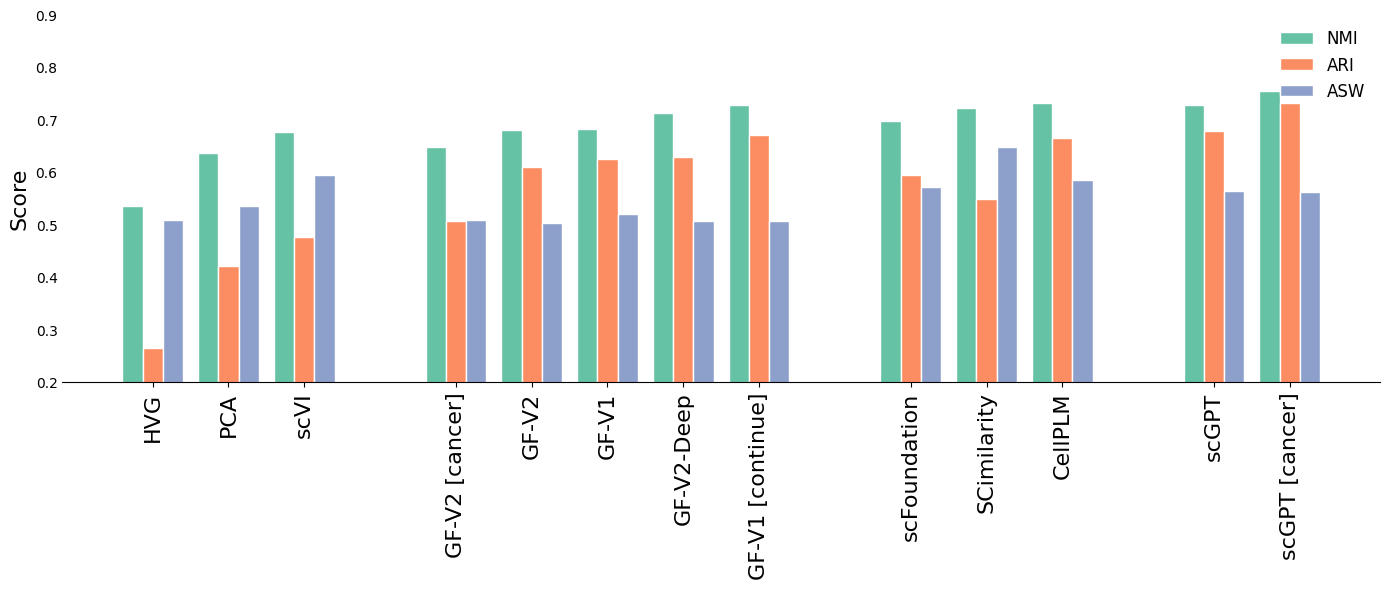

In [28]:
fig = plot_groups(results_mean_plot, cols=['NMI', 'ARI', 'ASW'])

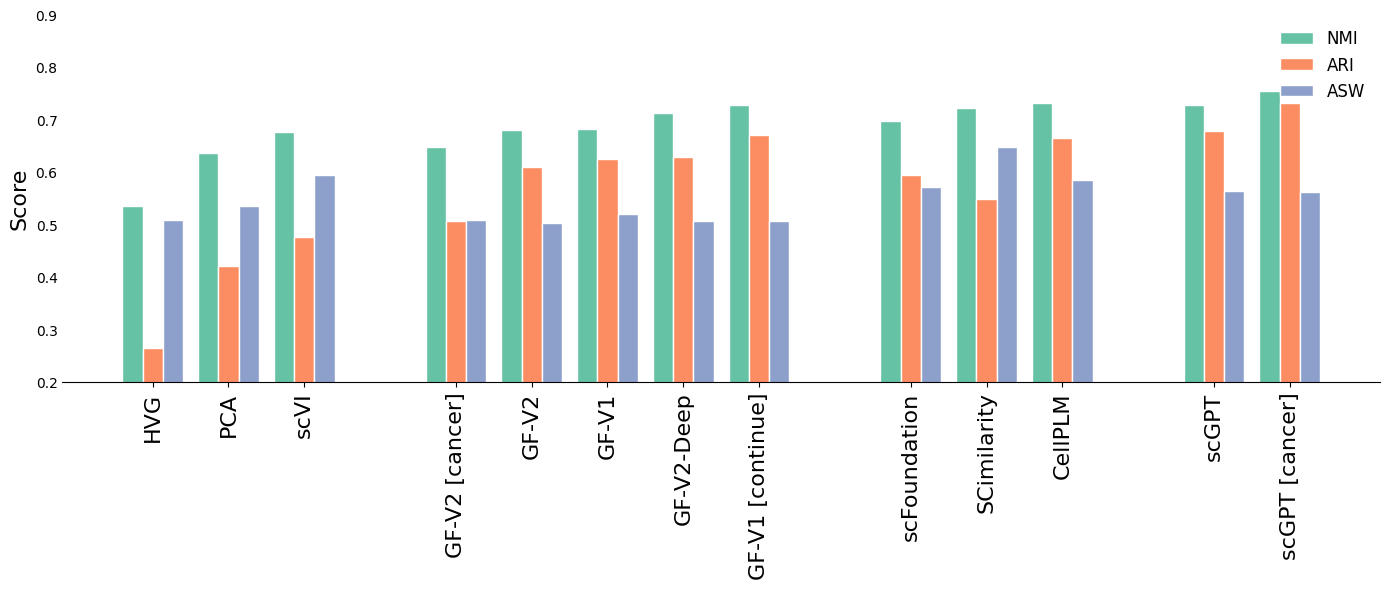

In [29]:
fig = plot_groups(results_mean_plot, cols=['NMI', 'ARI', 'ASW'])

In [30]:
fig.savefig('./plots/sub_compare_embedding_metrics.png', dpi=100)

## violinplot

In [31]:
results_10_runs = pd.read_csv('./fig2_metrics/metrics_10_runs.csv')

In [32]:
results_10_runs

,method,NMI_cluster/label,ARI_cluster/label,ASW_label,graph_conn,ASW_batch,ASW_label/batch,PCR_batch,avg_bio,group
0,Geneformer-V2-104M_continue,0.129519,0.097692,0.450335,0.650714,0.419690,0.722900,0.027858,0.225849,geneformer
1,Geneformer-V2-104M_continue,0.135984,0.102432,0.448726,0.664223,0.416998,0.747465,0.033049,0.229047,geneformer
2,Geneformer-V2-104M_continue,0.130433,0.087637,0.452150,0.644008,0.414649,0.759104,0.031897,0.223407,geneformer
3,Geneformer-V2-104M_continue,0.127309,0.093911,0.446396,0.644266,0.419008,0.739000,0.024874,0.222539,geneformer
4,Geneformer-V2-104M_continue,0.134912,0.098717,0.449302,0.645478,0.412620,0.737268,0.025222,0.227644,geneformer
...,...,...,...,...,...,...,...,...,...,...
135,gf-6L-30M-i2048_continue,0.710987,0.663331,0.499808,0.973431,0.471967,0.870298,0.147988,0.624709,geneformer
136,gf-6L-30M-i2048_continue,0.757802,0.706097,0.504240,0.967576,0.470649,0.884298,0.150742,0.656046,geneformer
137,gf-6L-30M-i2048_continue,0.723683,0.674200,0.516433,0.964077,0.470683,0.877303,0.156095,0.638105,geneformer
138,gf-6L-30M-i2048_continue,0.753129,0.699900,0.502409,0.977541,0.472319,0.872507,0.145492,0.651813,geneformer


In [33]:
nmi_df = results_10_runs[['method', 'NMI_cluster/label', 'group']].copy()
nmi_df.columns= ['method', 'NMI', 'group']

In [34]:
nmi_df['method'].unique()

array(['Geneformer-V2-104M_continue', 'Geneformer-V2-104M_CLcancer',
       'hvg', 'scvi_donor_id', 'Geneformer-V2-316M', 'Geneformer-V2-104M',
       'scgpt_cancer', 'scfoundation', 'scgpt', 'cellplm', 'scimilarity',
       'pca', 'gf-6L-30M-i2048', 'gf-6L-30M-i2048_continue'], dtype=object)

In [35]:
ind = nmi_df.method.str.startswith('__')
nmi_df = nmi_df[~ind]

In [36]:
nmi_df['method'] = nmi_df['method'].map(model_name_map)

In [37]:
nmi_df

,method,NMI,group
0,GF-V2 [continue],0.129519,geneformer
1,GF-V2 [continue],0.135984,geneformer
2,GF-V2 [continue],0.130433,geneformer
3,GF-V2 [continue],0.127309,geneformer
4,GF-V2 [continue],0.134912,geneformer
...,...,...,...
135,GF-V1 [continue],0.710987,geneformer
136,GF-V1 [continue],0.757802,geneformer
137,GF-V1 [continue],0.723683,geneformer
138,GF-V1 [continue],0.753129,geneformer


In [38]:
nmi_df = nmi_df[nmi_df['method'] != 'GF-V2 [continue]']

In [39]:

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import ttest_ind
# import itertools
# import matplotlib.gridspec as gridspec
# # nmi_df = nmi_df.reset_index()
# sns.set(style="whitegrid")

# # Get unique groups and count number of methods per group
# group_method_counts = nmi_df.groupby("group")["method"].nunique()
# total_methods = group_method_counts.sum()

# # Create grid with proportional width ratios
# fig = plt.figure(figsize=(6 * len(group_method_counts)/2, 6))
# gs = gridspec.GridSpec(1, len(group_method_counts), width_ratios=group_method_counts.values, figure=fig)

# # Plot each group
# for idx, (group, method_count) in enumerate(group_method_counts.items()):
#     ax = fig.add_subplot(gs[0, idx])
#     subset = nmi_df[nmi_df['group'] == group].copy()
#     # ax.grid(False)
#     # Sort methods by mean
#     method_stats = subset.groupby("method")["NMI"].median().sort_values(ascending=True)
#     ordered_methods = method_stats.index.tolist()
#     subset["method"] = pd.Categorical(subset["method"], categories=ordered_methods, ordered=True)

#     # Violin plot
#     sns.violinplot(
#         data=subset,
#         x="method",
#         y="NMI",
#         ax=ax,
#         inner="quartile",
#         scale="area",
#         # cut=0,
#         width=0.5
#     )

#     # Add line plot for means
#     stat_values = subset.groupby("method")["NMI"].median()[ordered_methods].values
#     ax.plot(range(len(ordered_methods)), stat_values, marker='o', linestyle='--', color='black', label='Mean')

#     ax.set_title(f"{group}")
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#     ax.set_xlabel('')
#     ax.set_ylim(0.4, .8)
#     if idx !=0 :
#         ax.set_yticklabels([])  # Hide the tick labels only, keep ticks and grid
#         ax.set_ylabel("")       # Remove the y-axis label (optional)
#         # ax.tick_params(axis='y', which='both', left=False)  # Remove tick marks

# # for i, ax in enumerate(axes):
# #     if i != 0:
# #         ax.set_yticks([])             # Remove y-axis ticks
# #         ax.set_ylabel("")             # Remove y-axis label (if any)
# #         ax.tick_params(axis='y', which='both', left=False)  # Remove tick marks
        
# # Overall title and layout
# # fig.suptitle("NMI_cluster/label Distribution by Method (Adaptive Width, Sorted, Mean Line)", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

In [40]:
# fig.savefig('./metrics/NMI.png', dpi=100)

## Testing

In [41]:
nmi_df['method'].unique()

array(['GF-V2 [cancer]', 'HVG', 'scVI', 'GF-V2-Deep', 'GF-V2',
       'scGPT [cancer]', 'scFoundation', 'scGPT', 'CellPLM',
       'SCimilarity', 'PCA', 'GF-V1', 'GF-V1 [continue]'], dtype=object)

In [42]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import itertools

# Load the data (adjust path as needed)
# nmi_df = pd.read_csv("nmi.csv")

# Perform all pairwise t-tests
all_methods = sorted(nmi_df['method'].unique())
pairwise_results = []

# Store group mapping for each method
method_to_group = nmi_df.drop_duplicates('method')[['method', 'group']].set_index('method')['group'].to_dict()

for m1, m2 in itertools.combinations(all_methods, 2):
    vals1 = nmi_df[nmi_df['method'] == m1]['NMI']
    vals2 = nmi_df[nmi_df['method'] == m2]['NMI']
    
    if len(vals1) > 1 and len(vals2) > 1:
        stat, pval = ttest_ind(vals1, vals2)
        mean1, mean2 = vals1.mean(), vals2.mean()
        mean_diff = mean1 - mean2
        pairwise_results.append({
            'method1': m1,
            'group1': method_to_group.get(m1, 'unknown'),
            'method2': m2,
            'group2': method_to_group.get(m2, 'unknown'),
            'mean1': mean1,
            'mean2': mean2,
            'mean_diff': mean_diff,
            'statistic': stat,
            'raw_p': pval
        })

# Convert to DataFrame
pairwise_df = pd.DataFrame(pairwise_results)

# Apply FDR correction
_, corrected_pvals, _, _ = multipletests(pairwise_df['raw_p'], method='fdr_bh')
pairwise_df['FDR_adj_p'] = corrected_pvals
pairwise_df['significant'] = pairwise_df['FDR_adj_p'] < 0.05
pairwise_df['direction'] = pairwise_df['mean_diff'].apply(lambda x: '>' if x > 0 else '<')

# Organize columns
pairwise_df = pairwise_df[[
    'group1', 'method1', 'group2', 'method2',
    'mean1', 'mean2', 'direction', 'mean_diff',
    'statistic', 'raw_p', 'FDR_adj_p', 'significant'
]]

# Optional: sort for readability
pairwise_df.sort_values(by=['group1', 'method1', 'group2', 'method2'], inplace=True)

# Display table
print(pairwise_df.to_string(index=False))

      group1          method1       group2          method2    mean1    mean2 direction  mean_diff  statistic        raw_p    FDR_adj_p  significant
    baseline              HVG     baseline              PCA 0.535608 0.636797         <  -0.101189 -15.241595 9.863247e-12 7.693333e-11         True
    baseline              HVG     baseline             scVI 0.535608 0.675993         <  -0.140385 -27.537772 3.629910e-16 5.662659e-15         True
    baseline              HVG        other      SCimilarity 0.535608 0.721498         <  -0.185889 -32.440977 2.009382e-17 5.224392e-16         True
    baseline              HVG scFoundation     scFoundation 0.535608 0.697104         <  -0.161496 -15.498205 7.452207e-12 6.458579e-11         True
    baseline              HVG        scgpt            scGPT 0.535608 0.727857         <  -0.192249 -39.106249 7.275214e-19 2.837333e-17         True
    baseline              HVG        scgpt   scGPT [cancer] 0.535608 0.754777         <  -0.219169 -29.790

In [43]:
pairwise_df = pairwise_df.round(3)

In [43]:
pairwise_df.to_csv('./fig2_metrics/stats_test.csv')

In [28]:
# n = len(ordered_methods)
# pairs= []
# for i in range(n):
#     for j in range(i + 1, n):
#         pairs.append((ordered_methods[i], ordered_methods[j]))

In [45]:
nmi_df

,method,NMI,group
10,GF-V2 [cancer],0.694601,geneformer
11,GF-V2 [cancer],0.634002,geneformer
12,GF-V2 [cancer],0.603562,geneformer
13,GF-V2 [cancer],0.588440,geneformer
14,GF-V2 [cancer],0.674633,geneformer
...,...,...,...
145,GF-V1 [continue],0.718855,geneformer
146,GF-V1 [continue],0.696219,geneformer
147,GF-V1 [continue],0.734348,geneformer
148,GF-V1 [continue],0.686989,geneformer


scGPT [cancer] CellPLM
scGPT [cancer] scGPT
scGPT [cancer] GF-V1 [continue]
scGPT [cancer] SCimilarity
scGPT [cancer] GF-V2-Deep
scGPT [cancer] scFoundation
scGPT [cancer] GF-V1
scGPT [cancer] GF-V2
scGPT [cancer] scVI
scGPT [cancer] GF-V2 [cancer]
scGPT [cancer] PCA
scGPT [cancer] HVG
CellPLM scGPT [cancer]
CellPLM scGPT
CellPLM GF-V1 [continue]
CellPLM SCimilarity
CellPLM GF-V2-Deep
CellPLM scFoundation
CellPLM GF-V1
CellPLM GF-V2
CellPLM scVI
CellPLM GF-V2 [cancer]
CellPLM PCA
CellPLM HVG
scGPT scGPT [cancer]
scGPT CellPLM
scGPT GF-V1 [continue]
scGPT SCimilarity
scGPT GF-V2-Deep
scGPT scFoundation
scGPT GF-V1
scGPT GF-V2
scGPT scVI
scGPT GF-V2 [cancer]
scGPT PCA
scGPT HVG
GF-V1 [continue] scGPT [cancer]
GF-V1 [continue] CellPLM
GF-V1 [continue] scGPT
GF-V1 [continue] SCimilarity
GF-V1 [continue] GF-V2-Deep
GF-V1 [continue] scFoundation
GF-V1 [continue] GF-V1
GF-V1 [continue] GF-V2
GF-V1 [continue] scVI
GF-V1 [continue] GF-V2 [cancer]
GF-V1 [continue] PCA
GF-V1 [continue] HVG
SCimil

/var/tmp/ipykernel_29219/4260098343.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


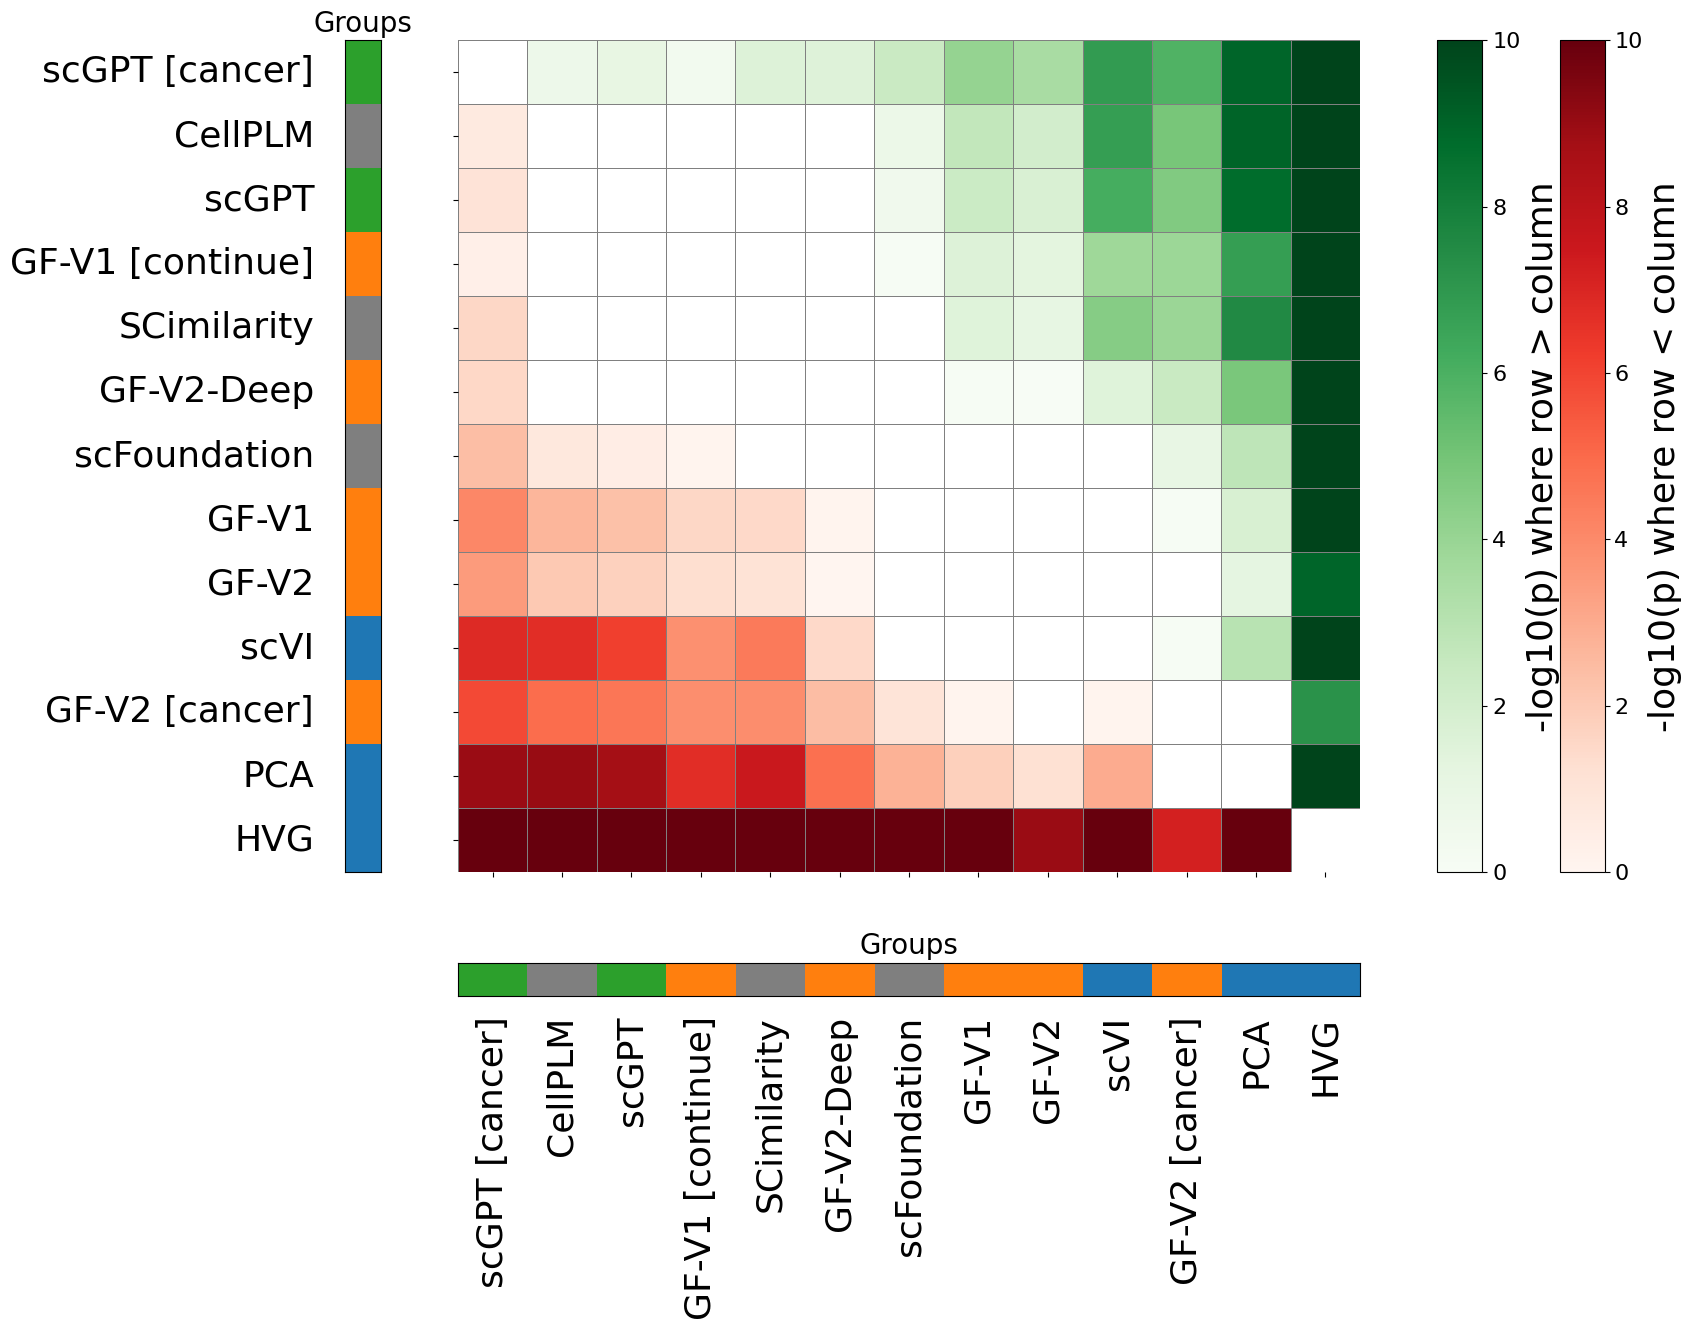

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind
import itertools



group_colors = {
    'Baseline': '#1f77b4',
    'Geneformer': '#ff7f0e',
    'scGPT': '#2ca02c',
    'other': '#7f7f7f',
    'Other': '#7f7f7f'
}

def get_pairwise_tests(nmi_df, ordered_methods):
    pairwise_results = []
    
    for m1, m2 in itertools.permutations(ordered_methods, 2):
    # for m1, m2 in pairs:
        print(m1, m2)
        vals1 = nmi_df[nmi_df['method'] == m1]['NMI']
        vals2 = nmi_df[nmi_df['method'] == m2]['NMI']
        if len(vals1) > 1 and len(vals2) > 1:
            stat, pval = ttest_ind(vals1, vals2)
            mean_diff = vals1.mean() - vals2.mean()
            pairwise_results.append({
                'method1': m1, 'method2': m2,
                'mean_diff': mean_diff, 'p_value': pval
            })

    pairwise_df = pd.DataFrame(pairwise_results)
    _, corrected_pvals, _, _ = multipletests(pairwise_df['p_value'], method='fdr_bh')
    pairwise_df['FDR_adj_p'] = corrected_pvals
    pairwise_df['significant'] = pairwise_df['FDR_adj_p'] < 0.05
    pairwise_df['direction'] = pairwise_df['mean_diff'].apply(lambda x: '>' if x > 0 else '<')
    return pairwise_df


method_nmi_means = nmi_df.groupby('method')['NMI'].mean()
method_group_df = pd.DataFrame({
    'method': method_nmi_means.index,
    'group': [map_groups(m) for m in method_nmi_means.index],
    'mean_nmi': method_nmi_means.values
})
# method_group_df['group'] = pd.Categorical(method_group_df['group'], categories=['Baseline', 'Geneformer', 'scGPT', 'Other'], ordered=True)
# method_group_df = method_group_df.sort_values(by=['group', 'mean_nmi'], ascending=[True, False])
method_group_df = method_group_df.sort_values(by=['mean_nmi'], ascending=[False])

ordered_methods = method_group_df['method'].tolist()

pairwise_df=  get_pairwise_tests(nmi_df, ordered_methods)

# === STEP 4: Build directional matrices ===
log_pval_pos = pd.DataFrame(np.nan, index=ordered_methods, columns=ordered_methods)
log_pval_neg = pd.DataFrame(np.nan, index=ordered_methods, columns=ordered_methods)
log_pval = pd.DataFrame(np.nan, index=ordered_methods, columns=ordered_methods)


for i, row in pairwise_df.iterrows():
    if row['significant']:
        val = -np.log10(row['FDR_adj_p'])
        log_pval.loc[row['method1'], row['method2']] = val
        print(row['direction'])
        if row['direction'] == '>':
            log_pval_pos.loc[row['method1'], row['method2']] = val
        else:
            log_pval_neg.loc[row['method1'], row['method2']] = val
        

log_pval_pos = log_pval_pos.clip(upper=10)
log_pval_neg = log_pval_neg.clip(upper=10)

# Flip x-axis
# reversed_methods = ordered_methods[::-1]
reversed_methods = ordered_methods


# Get group color bars
rgb_colors_y = np.array([to_rgb(group_colors[map_groups(m)]) for m in ordered_methods])
rgb_colors_x = np.array([to_rgb(group_colors[map_groups(m)]) for m in reversed_methods])

# === STEP 5: Final plot ===
fig = plt.figure(figsize=(18, 16))
gs = fig.add_gridspec(3, 4, width_ratios=(0.4, 10, 0.5, 0.5), height_ratios=(0.5, 10, 0.4),
                      wspace=0.3, hspace=0.3)

# Main heatmap axis
ax_main = fig.add_subplot(gs[1, 1])


sns.heatmap(log_pval_pos, cmap="Greens", cbar=False,
            ax=ax_main, linewidths=0.5, linecolor='gray')

sns.heatmap(log_pval_neg, cmap="Reds", 
            cbar=False, ax=ax_main, linewidths=0.5, linecolor='gray')


# sns.heatmap(log_pval, cmap="Reds", 
#             cbar=False, ax=ax_main, linewidths=0.5, linecolor='gray')

ax_main.grid(False)


ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=90, fontsize=26)
ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=26)
ax_main.tick_params(axis='x', pad=100)
ax_main.tick_params(axis='y', pad=100)

# Y group panel
ax_group_y = fig.add_subplot(gs[1, 0])
ax_group_y.imshow(rgb_colors_y.reshape(-1, 1, 3), aspect='auto')
ax_group_y.set_xticks([])
ax_group_y.set_yticks([])
ax_group_y.set_title("Groups", fontsize=20)

# X group panel
ax_group_x = fig.add_subplot(gs[2, 1])
ax_group_x.imshow(rgb_colors_x.reshape(1, -1, 3), aspect='auto')
ax_group_x.set_xticks([])
ax_group_x.set_yticks([])
ax_group_x.set_title("Groups", fontsize=20)

# Colorbars
norm = plt.Normalize(vmin=0, vmax=10)

ax_cbar_pos = fig.add_subplot(gs[1, 2])
sm = plt.cm.ScalarMappable(cmap="Greens", norm=norm)
sm.set_array([])
cbar_pos = fig.colorbar(sm, cax=ax_cbar_pos)
cbar_pos.set_label("-log10(p) where row > column", fontsize=26)  # Label font size
cbar_pos.ax.tick_params(labelsize=16)

# fig.colorbar(sm, cax=ax_cbar_pos)

ax_cbar_neg = fig.add_subplot(gs[1, 3])
sm2 = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm2.set_array([])
cbar_neg = fig.colorbar(sm2, cax=ax_cbar_neg)

cbar_neg.set_label("-log10(p) where row < column", fontsize=26)  # Label font size
cbar_neg.ax.tick_params(labelsize=16)

# fig.colorbar(sm2, cax=ax_cbar_neg)

plt.tight_layout()
fig.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.22) # Adjust margins

plt.show()
fig.savefig('plots/nmi_stat_testing.png', dpi=100)


#### log_pval_neg_flipped

In [ ]:
log_pval_pos_flipped

In [ ]:
pivot_df = pairwise_df.pivot_table(index='method1', columns='method2', values='FDR_adj_p', aggfunc='first')
pivot_df

In [ ]:
ordered_methods

In [ ]:
pivot_df.sort_index(ordered_methods)

In [ ]:
pivot_df[ordered_methods]

In [ ]:
method_group_df

In [ ]:
# Ensure each pair is ordered so that all comparisons fall in the upper triangle
df[['method1', 'method2']] = df[['method1', 'method2']].apply(sorted, axis=1, result_type='expand')

# Get all unique methods
all_methods = pd.unique(df[['method1', 'method2']].values.ravel('K'))
all_methods = sorted(all_methods)

# Initialize matrices
heatmap_data = pd.DataFrame(index=all_methods, columns=all_methods, dtype=float)
direction_data = pd.DataFrame(index=all_methods, columns=all_methods, dtype=object)

# Populate matrices with -log10(p-value) and direction symbol
for _, row in df.iterrows():
    method1 = row['method1']
    method2 = row['method2']
    pval = row['FDR_adj_p']
    direction = row['direction']

    value = -np.log10(pval) if pval > 0 else 50
    heatmap_data.loc[method1, method2] = value
    direction_data.loc[method1, method2] = direction

# Plot
plt.figure(figsize=(12, 10))
sns.set(style="white")

ax = sns.heatmap(
    heatmap_data,
    cmap="Blues",
    cbar_kws={'label': '-log10(FDR_adj_p)'},
    linewidths=0.5,
    linecolor='gray',
    square=True,
    mask=heatmap_data.isnull()
)

# Annotate direction (< or >)
for i in range(len(all_methods)):
    for j in range(len(all_methods)):
        dir_symbol = direction_data.iloc[i, j]
        if pd.notnull(dir_symbol):
            ax.text(j + 0.5, i + 0.5, dir_symbol, ha='center', va='center', fontsize=8, color='black')

# Format axes
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title('Upper-Triangle Pairwise Test (-log10 p-value) with Direction')
plt.tight_layout()
plt.show()